In [1]:
# Import Libraries
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Read Dataset
df = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')

In [3]:
# Display Dataset
df.head(10)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13840,33.2
6,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,3037,53.6
7,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Connecticut,2078,53.2
8,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Delaware,608,61.9
9,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,District of Columbia,427,61.0


In [4]:
df.tail(10)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10858,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Tennessee,675,12.3
10859,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Texas,1669,10.3
10860,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,United States,35525,13.0
10861,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Utah,135,9.1
10862,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,56,9.2
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9
10867,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wyoming,30,6.8


In [5]:
# List Dtypes
df.dtypes

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                       int64
Age-adjusted Death Rate    float64
dtype: object

In [6]:
# Display Number of Missing Values by Feature
df.select_dtypes(include=['object', 'int64', 'float64']).isnull().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [7]:
# Isolate all Rows Without the Value 'United States'
indexStates = df[df['State'] != 'United States'].index

# Drop all Selected Rows 
df.drop(indexStates, inplace=True)

In [8]:
# Isolate all Rows With the Value 'All Causes'
indexCauses = df[df['113 Cause Name'] == 'All Causes'].index

# Drop all Selected Rows 
df.drop(indexCauses, inplace=True)

In [9]:
df.head(10)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
104,2017,Alzheimer's disease (G30),Alzheimer's disease,United States,121404,31.0
156,2017,Cerebrovascular diseases (I60-I69),Stroke,United States,146383,37.6
208,2017,Chronic lower respiratory diseases (J40-J47),CLRD,United States,160201,40.9
260,2017,Diabetes mellitus (E10-E14),Diabetes,United States,83564,21.5
312,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,647457,165.0
364,2017,Influenza and pneumonia (J09-J18),Influenza and pneumonia,United States,55672,14.3
416,2017,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,47173,14.0
468,2017,Malignant neoplasms (C00-C97),Cancer,United States,599108,152.5
520,2017,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,United States,50633,13.0


In [10]:
df.tail(10)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10340,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,97860,35.3
10444,1999,Alzheimer's disease (G30),Alzheimer's disease,United States,44536,16.5
10496,1999,Cerebrovascular diseases (I60-I69),Stroke,United States,167366,61.6
10548,1999,Chronic lower respiratory diseases (J40-J47),CLRD,United States,124181,45.4
10600,1999,Diabetes mellitus (E10-E14),Diabetes,United States,68399,25.0
10652,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,725192,266.5
10704,1999,Influenza and pneumonia (J09-J18),Influenza and pneumonia,United States,63730,23.5
10756,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29199,10.5
10808,1999,Malignant neoplasms (C00-C97),Cancer,United States,549838,200.8
10860,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,United States,35525,13.0


In [11]:
print(df.shape)

(190, 6)


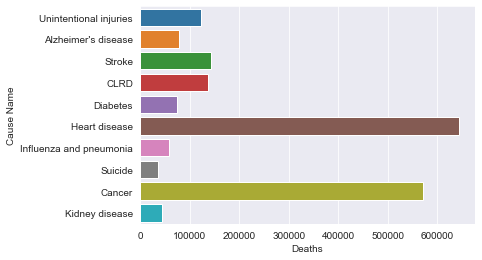

In [12]:
# Plot Number of Deaths for Each Cause
sns.barplot(x='Deaths', y='Cause Name', data=df, ci=None)
plt.show()

In [13]:
# Save Cleaned Dataframe to a New File
df.to_csv('cleaned_df.csv', index=None)